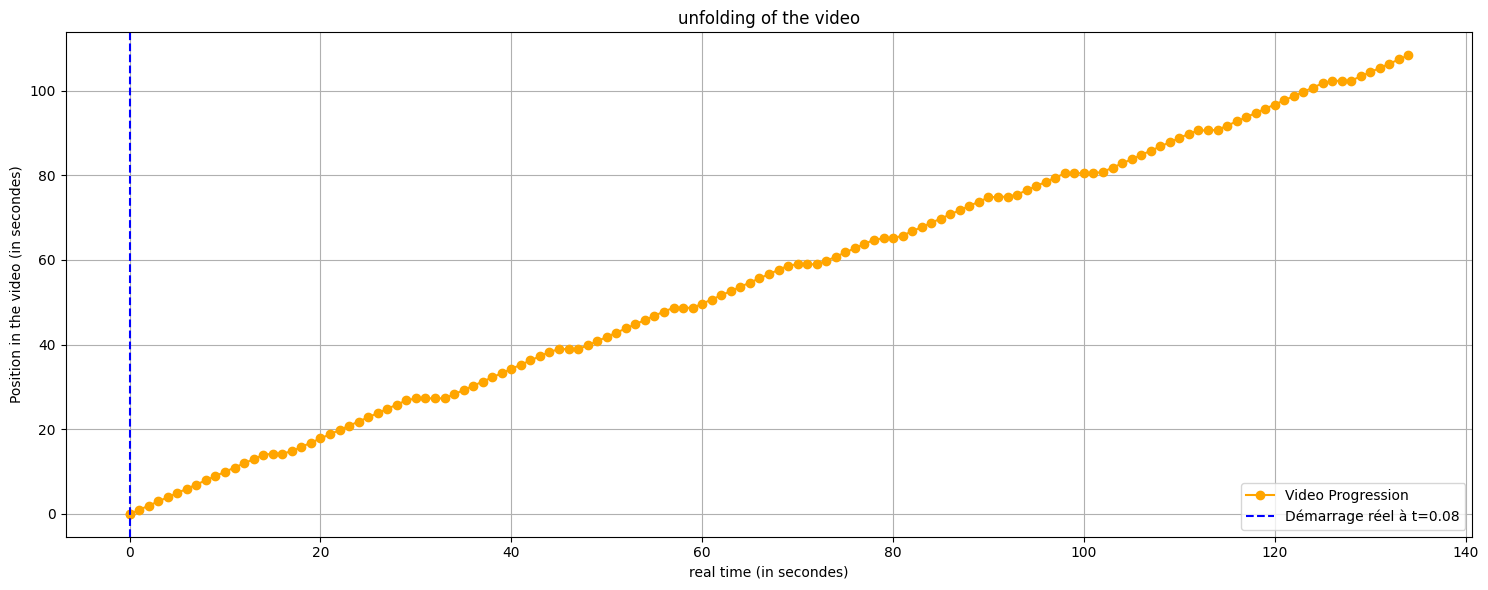

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("qoe_data_received.csv", sep=";")
df["videoTime"] = df["videoTime"].astype(str).str.replace(",", ".").astype(float)

start_value = df["videoTime"].iloc[0]
start_time = 1.0 - start_value

p0 = pd.DataFrame([{"realTime": 0.0, "videoTime": 0.0}])

p1 = pd.DataFrame([{"realTime": start_time, "videoTime": 0.0}])

df_real = df.copy()
df_real["realTime"] = np.arange(1.0, 1.0 + len(df_real), 1.0)

df_plot = pd.concat([p0, p1, df_real], ignore_index=True)

plt.figure(figsize=(15, 6))
plt.plot(df_plot["realTime"], df_plot["videoTime"], color='orange', marker='o', label="Video Progression")
plt.axvline(x=start_time, color='blue', linestyle='--', label=f"Démarrage réel à t={start_time:.2f}")
plt.title("unfolding of the video")
plt.xlabel("real time (in secondes)")
plt.ylabel("Position in the video (in secondes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


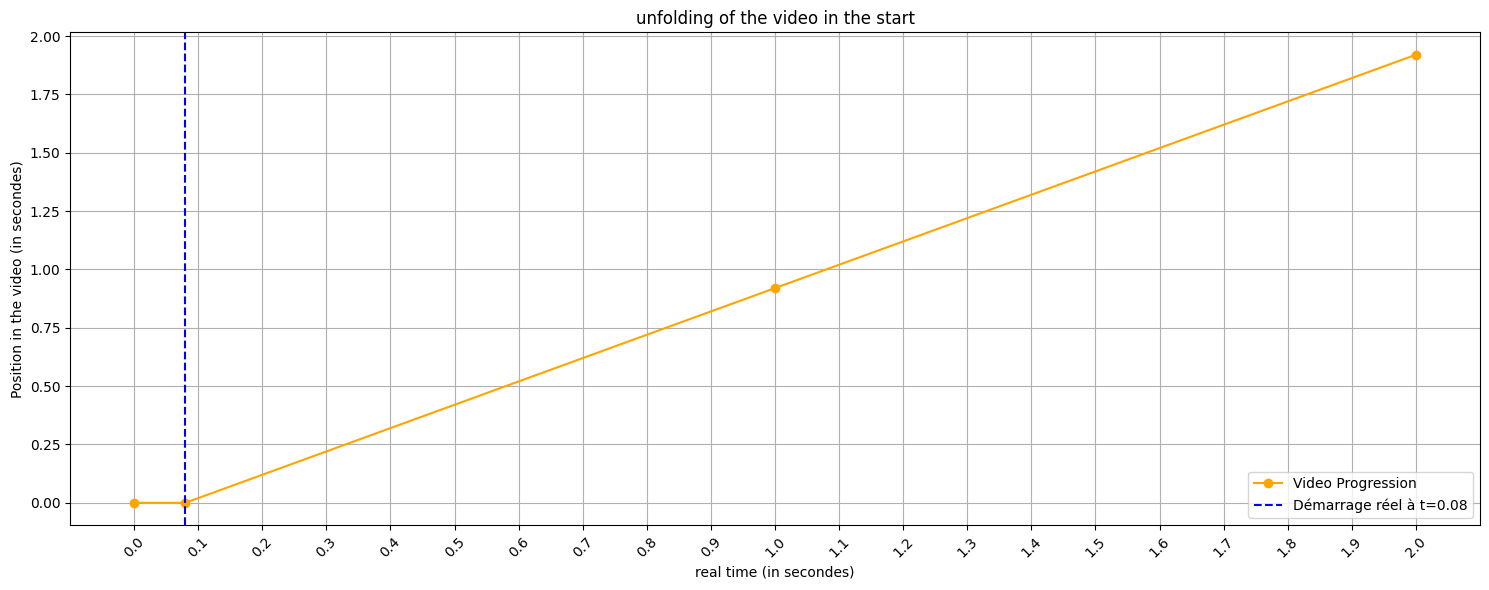

In [2]:
df_start = df_plot[df_plot["realTime"] <= 2]
x_ticks = np.arange(0, 2.1, 0.1)

plt.figure(figsize=(15, 6))
plt.plot(df_start["realTime"], df_start["videoTime"], color='orange', marker='o', label="Video Progression")
plt.axvline(x=start_time, color='blue', linestyle='--', label=f"Démarrage réel à t={start_time:.2f}")
plt.title("unfolding of the video in the start")
plt.xlabel("real time (in secondes)")
plt.ylabel("Position in the video (in secondes)")
plt.xticks(x_ticks, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

df = pd.read_csv("qoe_data_received.csv", sep=";")
df["videoTime"] = df["videoTime"].astype(str).str.replace(",", ".").astype(float)
df["delta"] = df["videoTime"].diff().fillna(0)

freeze_frames = df[df["delta"] == 0].shape[0]
total_frames = df.shape[0]

freeze_percentage = (freeze_frames / total_frames) * 100

In [4]:
import pandas as pd

df = pd.read_csv("qoe_data_received.csv", sep=";")
df["videoTime"] = df["videoTime"].astype(str).str.replace(",", ".").astype(float)

df["delta"] = df["videoTime"].diff().fillna(0)

total_duration = df["videoTime"].max()
start_time = 1.0 - df["videoTime"].iloc[0] 
start_limit = total_duration * 0.10
end_limit = total_duration * 0.90

def zone_classification(t):
    if t <= start_limit:
        return "start"
    elif t >= end_limit:
        return "end"
    else:
        return "middle"

df["zone"] = df["videoTime"].apply(zone_classification)

total_counts = df.groupby("zone").size()
freeze_counts = df[df["delta"] == 0].groupby("zone").size()

result = pd.DataFrame({
    "total_frames": total_counts,
    "freeze_frames": freeze_counts
}).fillna(0)

result["freeze_percent"] = (result["freeze_frames"] / result["total_frames"]) * 100

In [5]:
def extract_freeze_time(serie):
    times = serie.str.extract(r'(\d+,\d+)s', expand=False)
    return times.str.replace(',', '.', regex=False).astype(float)

values = extract_freeze_time(df['freezes'])
mean = values.mean()
min = values.min()
max = values.max()

In [6]:
print(f"❄ Percentage of Freeze : {freeze_percentage:.2f}% ({int(freeze_frames)} over {total_frames} mesures)")

for zone in ["start", "middle", "end"]:
    if zone in result.index:
        p = result.loc[zone, "freeze_percent"]
        n = int(result.loc[zone, "total_frames"])
        print(f"❄ Freeze in the {zone} zone : {p:.2f}% over {n} mesures")
    else:
        print(f"no data in the {zone} zone.")
print(f"❄ mean of the freezes : {mean:.2f}s")
print(f"❄ minimun time of the freezes : {min:.2f}s")
print(f"❄ maximun time of the freezes : {max:.2f}s")
print(f"⏱ Time to start the video : {start_time*1000:.2f} ms")

❄ Percentage of Freeze : 12.69% (17 over 134 mesures)
❄ Freeze in the start zone : 10.00% over 10 mesures
❄ Freeze in the middle zone : 13.64% over 110 mesures
❄ Freeze in the end zone : 7.14% over 14 mesures
❄ mean of the freezes : 2.59s
❄ minimun time of the freezes : 2.06s
❄ maximun time of the freezes : 3.66s
⏱ Time to start the video : 80.00 ms


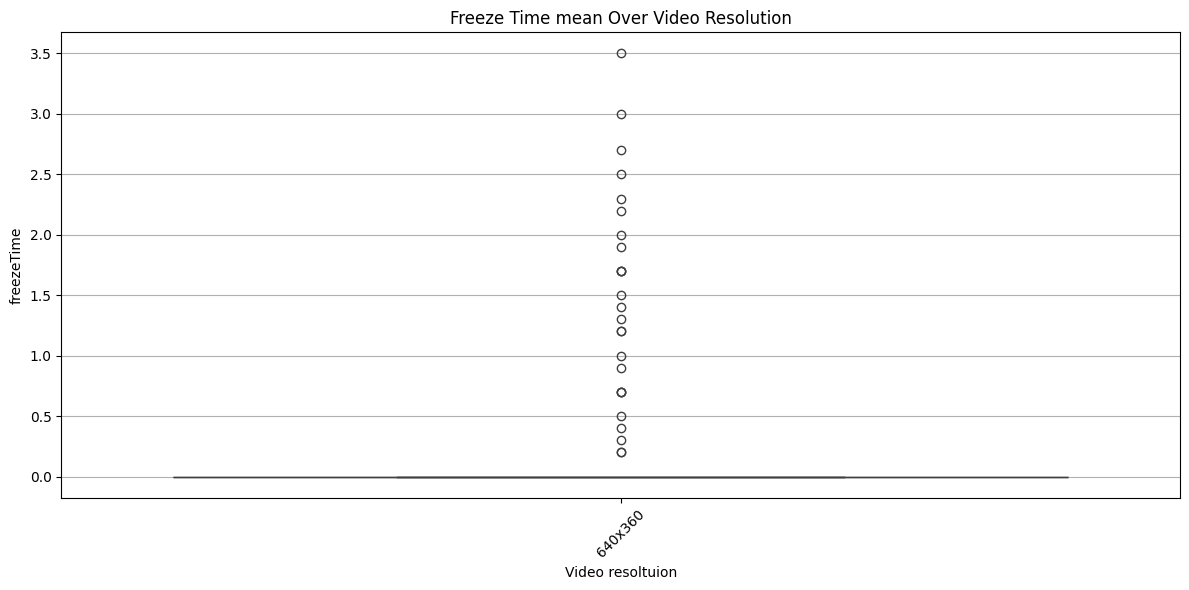

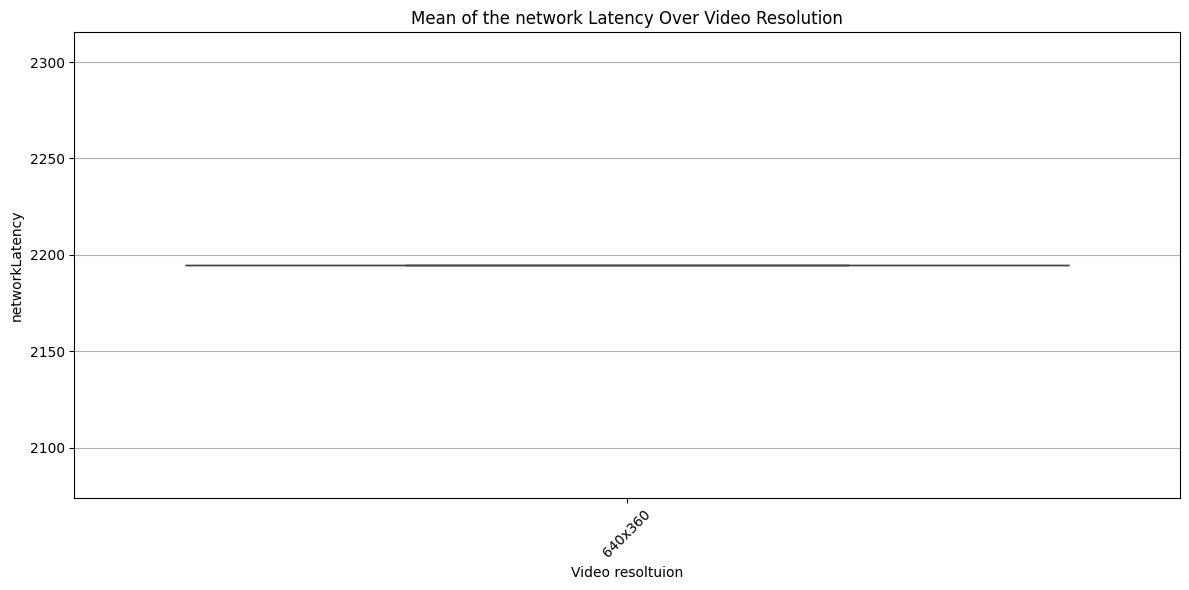

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("qoe_data_received.csv", sep=";")

df['freezeTime'] = df['freezeTime'].str.replace(',', '.', regex=False).astype(float)
df['networkLatency'] = df['networkLatency'].str.replace(',', '.', regex=False).astype(float)
df['videoResolution'] = df['videoResolution'].astype(str).str.strip()

def plot_metric_by_resolution(metric, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='videoResolution', y=metric, data=df)
    plt.title(f'{title} Over Video Resolution')
    plt.xlabel('Video resoltuion')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_metric_by_resolution('freezeTime', 'Freeze Time mean')
plot_metric_by_resolution('networkLatency', 'Mean of the network Latency')


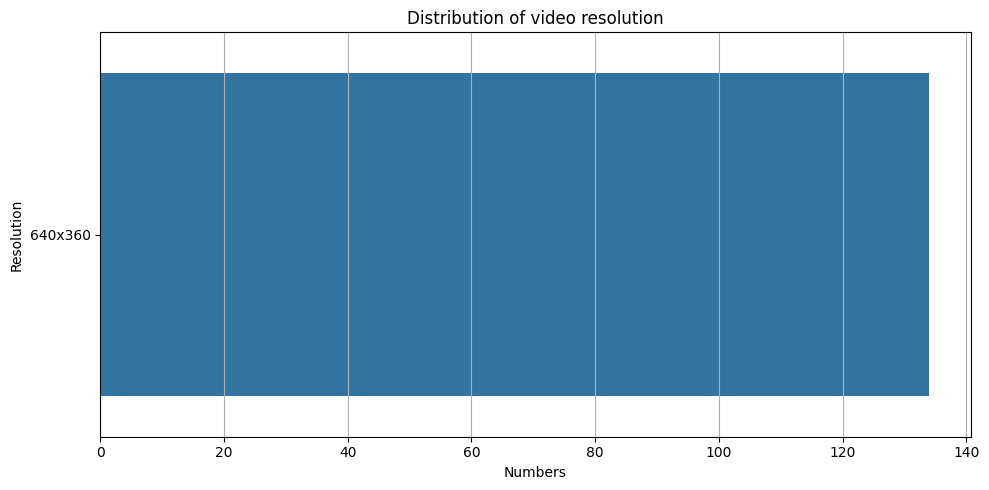

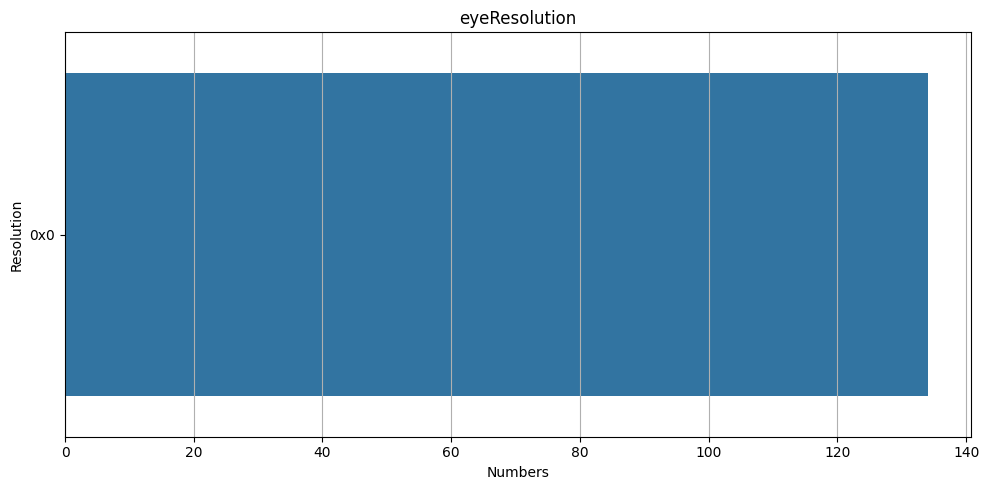

In [14]:
import seaborn as sns

df['videoResolution'] = df['videoResolution'].astype(str).str.strip()
df['eyeResolution'] = df['eyeResolution'].astype(str).str.strip()

def plot_resolution_distribution(column_name, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column_name, data=df, order=df[column_name].value_counts().index)
    plt.title(title)
    plt.xlabel("Numbers")
    plt.ylabel("Resolution")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

plot_resolution_distribution('videoResolution', "Distribution of video resolution")
plot_resolution_distribution('eyeResolution', "eyeResolution")


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("qoe_data_received.csv", sep=";")

df['videoFrameRate'] = df['videoFrameRate'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['targetFramerate'] = pd.to_numeric(df['targetFramerate'], errors='coerce')

df['framerate_gap'] = df['videoFrameRate'] - df['targetFramerate']

df_filtered = df[
    (df['targetFramerate'].notna()) &
    (df['targetFramerate'] > 0) &
    (df['videoFrameRate'].notna()) &
    (df['framerate_gap'].notna())
]

if not df_filtered.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='targetFramerate', y='framerate_gap', data=df_filtered)
    plt.axhline(0, color='red', linestyle='--', label='Taux cible atteint')
    plt.title("videoFrameRate - targetFramerate")
    plt.ylabel("fps")
    plt.xlabel("targetFramerate")
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No valid data.")


No valid data.
